# 📡📡🌏 GeoAI Ground-Level NO2 Estimation Challenge

## Project Overview: 
The GeoAI Ground-Level NO2 Estimation Challenge is a competition designed to advance the field of air quality monitoring through the application of machine learning (ML) models. Participants are tasked with estimating surface-level nitrogen dioxide (NO2) concentrations using publicly available remote sensing data as predictor variables. This challenge aims to promote the development of accurate, simple, reproducible, and transparent methodologies for NO2 monitoring.

### Objective
The primary objective of this challenge is to develop robust ML models capable of estimating ground-level NO2 concentrations. These models leverage remote sensing data processed through Google Earth Engine (GEE) and will be validated using ground truth data from air quality monitoring stations. The models will be tested both spatially across the study area and temporally throughout the year.


### Study Area
Part of Lombardy and Veneto regions.


## About Data
* Ground-truth data from air quality monitoring stations in the continental part of Lombardy and Veneto regions.
* Remote sensing data of NO2 from Sentinel-5P TROPOMI, precipitation from CHIRPS and land surface temperature from NOAA datasets, all from Google Earth Engine (GEE).


## Data Given
* Train.csv:or modelling which includes ground-truth and remote sensing data
* Test.csv:remote sensing data and will be used to evaluate the developed model.


## Features
1. **id**: Unique identifier for each data entry.
2. **lat**: Latitude coordinate.
3. **lon**: Longitude coordinate.
4. **Precipitation**: Amount of precipitation in the area.
5. **LST (Land Surface Temperature)**: Temperature of the land surface.
6. **AAI (Aerosol Absorbing Index)**: Measure of aerosols' ability to absorb light.
7. **Cloud Fraction**: Proportion of the sky covered by clouds.
8. **NO2_Stratospheric**: Stratospheric nitrogen dioxide concentration.
9. **NO2_Total**: Total column nitrogen dioxide concentration.
10. **NO2_Tropospheric**: Tropospheric nitrogen dioxide concentration.
11. **Tropopause Pressure**: Pressure at the tropopause.
12. **GT_NO2 (Ground Truth NO2)**: Measured ground-level nitrogen dioxide concentration.


## Winning solutions need to submit:
* A model file developed in the challenge that can be used to estimate surface NO2 levels.
* An evaluation dataset file with an added column of estimated surface values of NO2 concentrations by the developed model.
* A technical document describing the whole process of developing your model (from pre-processing to evaluation).
The code used to process the data and train the model, together with the final modelling dataset you used.

Note: we will evaluate the procedure using the technical document; the submission will not be accepted if the methodology is evaluated as unrepeatable. The submitted code is limited to R, Python and/or GEE JavaScript.


## Evaluation
The evaluation metric for this competition is Root Mean Squared Error.

An evaluation jury will be set up to give score to each participant considering the four aspects listed below:
* Performance assessment on in-situ data from selected ground stations not provided to participants, using Pearson correlation (r), Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) as accuracy metrics.
* Transparency, simplicity and reproducibility of the model methodology.
* Ability to estimate ground-level NO2 concentrations with high accuracy, regardless of season and location in the study area.
* Innovation and practicality in approach to NO2 monitoring and modelling.
Note: The ground truth data used for evaluation are independent from the training data set.

#### Key considerations:
* Ensuring the transparency of their model development process, including data pre-processing, feature selection, model architecture and hyper-parameter tuning.
* Demonstrate reproducibility by providing clear documentation and code that allows others to replicate their results.
* Develop models capable of estimating NO2 levels in different weather conditions and seasons, demonstrating adaptability and robustness.
* Participants don't have to use all the parameters provided, but are encouraged to create new ones from the existing ones, which could help to improve the performance of the model.

## Submission For every row in the dataset, submission files should contain 2 columns: ID and Target.
Submission file should look like this (numbers to show format only):
- '''ID_Zindi	GT_NO2
- ID_2MYNQS	22.5
- ID_P4U5WU	13.01'''

### Derived Features
1. **NO2_Trop/NO2_Total Ratio**: Ratio of tropospheric NO2 to total NO2.
2. **NO2_Trop/NO2_Strat Ratio**: Ratio of tropospheric NO2 to stratospheric NO2.
5. **Temperature-Precipitation Interaction**: Interaction term between LST and precipitation.
6. **Cloud Impact Factor**: Interaction term between cloud fraction and NO2 concentrations.
7. **Seasonal Indicators**: Categorical feature indicating season (e.g., winter, spring, summer, fall).
8. **Month**: Month of the year as a categorical feature.
9. **Day of the Year**: Day of the year as a numerical feature.
10. **Week of the Year**: Week number of the year as a numerical feature.
11. **Day of the Week**: Day of the week as a categorical feature.
13. **Rolling Mean NO2**: Rolling mean of NO2 concentrations over a specified window.
15. **Temperature-Cloud Interaction**: Interaction term between LST and cloud fraction.
16. **Precipitation-Cloud Interaction**: Interaction term between precipitation and cloud fraction.
17. **Temperature-AAI Interaction**: Interaction term between LST and AAI.
18. **Precipitation-AAI Interaction**: Interaction term between precipitation and AAI.

### Statistical Features
1. **Mean NO2**: Mean value of NO2 over a specified time window.
2. **Median NO2**: Median value of NO2 over a specified time window.
3. **Max NO2**: Maximum value of NO2 over a specified time window.
4. **Min NO2**: Minimum value of NO2 over a specified time window.
5. **Variance of NO2**: Variance of NO2 values over a specified time window.
6. **Skewness of NO2**: Skewness of NO2 values over a specified time window.
7. **Kurtosis of NO2**: Kurtosis of NO2 values over a specified time window.

### Temporal Features
1. **Hour of the Day**: Hour of the day as a categorical feature (if time data is available).
2. **Day/Night Indicator**: Binary indicator for day or night based on the time of day.
3. **Holiday Indicator**: Binary indicator for holidays.

### Additional Derived Features
1. **Cloud-Free Days Count**: Count of days with cloud fraction below a certain threshold.
2. **High-Precipitation Days Count**: Count of days with precipitation above a certain threshold.
3. **High-Temperature Days Count**: Count of days with LST above a certain threshold.
4. **Low-Temperature Days Count**: Count of days with LST below a certain threshold.

These features can be used to build robust machine learning models, providing a comprehensive view of the factors influencing ground-level NO2 concentrations. The choice of features will depend on the specific goals of the analysis and the characteristics of the dataset.

Define a function that loads the data, format the data columns and also replace the file path with your file path the data file path

In [1]:
## install all required libaries
import subprocess

packages = ['geopandas','numpy',
            'matplotlib', 'pandas',
            'seaborn','xgboost', 'sklearn']

for package in packages:
    try:
        __import__(package)
    except ModuleNotFoundError:
        subprocess.check_call(['pip', 'install', package])

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score,
                            mean_absolute_error,
                            precision_score,classification_report)

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [3]:
# data file path
train_data_path = "data/Train.csv"

# functions to read data and format columns
def load_data(file_path):
    data = pd.read_csv(file_path)
    # rename columns
    cols = [x.replace(" ","_").lower() for x in list(data.columns)]
    data.columns=cols
    return data

In [4]:
# Import training and validation sets
train_df = load_data(train_data_path)

In [5]:
# get the total rows and columns in the data
train_df.shape

(86584, 14)

In [6]:
# Have a glimpse of the data
train_df.head()

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloudfraction,no2_strat,no2_total,no2_trop,tropopausepressure,gt_no2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


Check the data info and describe the datasets

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_zindi            86584 non-null  object 
 1   date                86584 non-null  object 
 2   id                  86584 non-null  object 
 3   lat                 86584 non-null  float64
 4   lon                 86584 non-null  float64
 5   precipitation       86584 non-null  float64
 6   lst                 46798 non-null  float64
 7   aai                 73709 non-null  float64
 8   cloudfraction       73709 non-null  float64
 9   no2_strat           73709 non-null  float64
 10  no2_total           73709 non-null  float64
 11  no2_trop            51111 non-null  float64
 12  tropopausepressure  73709 non-null  float64
 13  gt_no2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB


Data Transformation

In [7]:
# rename columns
train_df = train_df.rename({'cloudfraction':'cloud_fraction',
                          'tropopausepressure':'tropopause_pressure'},axis=1)

In [8]:
# check columns to confirm renamed columns
train_df.columns

Index(['id_zindi', 'date', 'id', 'lat', 'lon', 'precipitation', 'lst', 'aai',
       'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
       'tropopause_pressure', 'gt_no2'],
      dtype='object')

### Formatting Dates for Temporal Analysis

To enhance our time series data, we need to enrich the date component by extracting key time-related features. This allows for a more detailed temporal analysis of weather data.

We can achieve this efficiently by creating a function that uses `pd.to_datetime` from pandas to format dates and extract essential components such as year and month.
:


In [9]:
import pandas as pd

def format_date(df: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Converts the date column to datetime and extracts year and month.
    """
    # Convert the date to pandas datetime
    df['date'] = pd.to_datetime(df[date_column])

    # Extract year and month into new fields
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week

    return df

# Apply the format date function
train_df = format_date(train_df, "date")

# Check the data
train_df.head()

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloud_fraction,no2_strat,no2_total,no2_trop,tropopause_pressure,gt_no2,year,month,week
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0,2019,1,1
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0,2019,1,1
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0,2019,1,1
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0,2019,1,1
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0,2019,1,1


In [10]:
# descibe datasets
train_df.describe()

,date,lat,lon,precipitation,lst,aai,cloud_fraction,no2_strat,no2_total,no2_trop,tropopause_pressure,gt_no2,year,month,week
count,86584,86584.000000,86584.000000,86584.000000,46798.000000,73709.000000,73709.000000,73709.000000,73709.000000,51111.000000,73709.000000,82051.000000,86584.000000,86584.000000,86584.0
mean,2020-07-01 12:00:00,45.421456,10.014272,2.585528,299.268841,-1.274999,0.200606,0.000045,0.000156,0.000105,16655.112392,24.535051,2020.000000,6.521898,26.645985
min,2019-01-01 00:00:00,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000,2019.000000,1.000000,1.0
25%,2019-10-01 18:00:00,45.249544,9.195325,0.000000,290.920000,-1.749425,0.023900,0.000034,0.000100,0.000047,14432.114060,11.875000,2019.000000,4.000000,14.0
50%,2020-07-01 12:00:00,45.478996,9.611738,0.000000,300.760000,-1.349746,0.078478,0.000047,0.000122,0.000071,16711.190570,20.000000,2020.000000,7.000000,27.0
75%,2021-04-01 06:00:00,45.601232,10.683357,0.000000,307.940000,-0.878857,0.278451,0.000056,0.000173,0.000129,19252.648570,33.050000,2021.000000,10.000000,40.0
max,2021-12-31 00:00:00,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333,2021.000000,12.000000,53.0
std,NaN,0.225409,1.056637,7.617394,10.927167,0.693003,0.259607,0.000012,0.000103,0.000092,3000.748790,17.108838,0.816129,3.449006,15.070319


In [11]:
# check for the count of total missing values per features
train_df.isna().sum()

id_zindi                   0
date                       0
id                         0
lat                        0
lon                        0
precipitation              0
lst                    39786
aai                    12875
cloud_fraction         12875
no2_strat              12875
no2_total              12875
no2_trop               35473
tropopause_pressure    12875
gt_no2                  4533
year                       0
month                      0
week                       0
dtype: int64

In [12]:
# is there is any duplicate data drop it
print(f"total data before duplicates is dropped: {len(train_df)}")
train_df = train_df.copy().drop_duplicates()
print(f"total data after duplicates is dropped: {len(train_df)}")

total data before duplicates is dropped: 86584
total data after duplicates is dropped: 86584


### Filling Missing Values
**Strategy for Filling Missing Values**

In my weather dataset, I often encounter missing values. Since the data is collected multiple times a day at the same location, filling these gaps with overall averages might not capture the daily variations accurately. So, here’s how I approach it:

1. **Group Data by Time of Day**: First, I organize the data based on the specific times of day when it was collected.

2. **Calculate Daily Averages**: Next, I compute the average value for each weather variable at each time of day. This helps me understand the typical values for different times.

3. **Fill Missing Values**: I then replace the missing data with these daily averages, ensuring that the imputed values fit the usual daily patterns.

4. **Additional Steps if Needed**:
   - If some missing values remain, I fill them using weekly averages.
   - If there are still gaps, I use monthly averages.
   - Finally, if there are still missing values, I fill them with yearly averages.

This method ensures that the imputed values are relevant to the time of day and preserve the natural daily variations in the weather data, enhancing the quality and reliability of my analysis.

In [13]:

# this functins fill missing values based on taily average of the date the data is missing for

def fill_missing_values(data: pd.DataFrame,
                        columns_list: list,
                        groupby_column_1: str, 
                        groupby_column_2: str = None,
                        groupby_column_3: str = None,) -> pd.DataFrame:
    """
    Fills missing values based on the daily average of the specified columns.

    """
    # Group by columns and fill missing values with the mean of the respective group
    if groupby_column_2:
        for column in columns_list:
            data[column] = data.groupby([groupby_column_1, groupby_column_2])[column].transform(lambda x: x.fillna(x.mean()))

    if groupby_column_3:
        for column in columns_list:
            data[column] = data.groupby([groupby_column_1, groupby_column_2, groupby_column_3])[column].transform(lambda x: x.fillna(x.mean()))
    else:
        for column in columns_list:
            data[column] = data.groupby(groupby_column_1)[column].transform(lambda x: x.fillna(x.mean()))
    
    return data

# extract columns with missing values
fill_missing_value = train_df[['lst','aai','cloud_fraction','no2_strat','no2_total','no2_trop','tropopause_pressure',"gt_no2"]]

train_data_df = fill_missing_values(train_df, fill_missing_value,'date')

In [16]:
# check again if there is still data with non values
train_data_df.isna().sum()

id_zindi                  0
date                      0
id                        0
lat                       0
lon                       0
precipitation             0
lst                    9401
aai                    2054
cloud_fraction         2054
no2_strat              2054
no2_total              2054
no2_trop               8690
tropopause_pressure    2054
gt_no2                    0
year                      0
month                     0
week                      0
dtype: int64

I’m currently contemplating dropping the data with missing values, as this would indicate that no data was collected for those days. However, this would result in losing a significant portion of our dataset. Therefore, the next step is to fill in the missing values using weekly averages instead.

In [14]:
# Exclude 'gt_no2' from the columns for filling missing values since it’s already been filled.
fill_missing_value = train_data_df[['lst', 'aai', 'cloud_fraction', 'no2_strat',
                                    'no2_total', 'no2_trop', 'tropopause_pressure']]

# Fill missing values by grouping data by year, week, and month.
df_train = fill_missing_values(train_data_df, fill_missing_value, 'year', 'week', 'month')

# Check the number of missing values in each column after filling.
df_train.isna().sum()

id_zindi               0
date                   0
id                     0
lat                    0
lon                    0
precipitation          0
lst                    0
aai                    0
cloud_fraction         0
no2_strat              0
no2_total              0
no2_trop               0
tropopause_pressure    0
gt_no2                 0
year                   0
month                  0
week                   0
dtype: int64

In [15]:
df_train.head(7).T

,0,1,2,3,4,5,6
id_zindi,ID_ENTGC7,ID_8JCCXC,ID_V3136Z,ID_KRVZDJ,ID_PR351A,ID_4XN0K8,ID_O0RJKX
date,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00
id,PD01,PD04,RO01,RO02,RO03,TV01,TV02
lat,45.601585,45.371005,45.045825,45.104075,45.038758,45.889734,45.671721
lon,11.903551,11.84083,12.060869,11.553241,11.790152,12.307124,12.237807
precipitation,0.0,3.047342,0.0,1.200467,1.274564,0.0,0.0
lst,281.242759,281.242759,281.242759,281.242759,281.242759,278.38,281.242759
aai,0.230527,-0.074006,0.02447,-0.010442,-0.176178,-0.366831,0.188599
cloud_fraction,0.559117,0.869309,0.67416,0.920054,0.747464,0.324392,0.818422
no2_strat,0.000024,0.000024,0.000024,0.000024,0.000024,0.000023,0.000024


In [16]:
df_train.describe()

,date,lat,lon,precipitation,lst,aai,cloud_fraction,no2_strat,no2_total,no2_trop,tropopause_pressure,gt_no2,year,month,week
count,86584,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.000000,86584.0
mean,2020-07-01 12:00:00,45.421456,10.014272,2.585528,296.361045,-1.262211,0.234554,0.000044,0.000160,0.000105,16712.357387,24.489584,2020.000000,6.521898,26.645985
min,2019-01-01 00:00:00,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000,2019.000000,1.000000,1.0
25%,2019-10-01 18:00:00,45.249544,9.195325,0.000000,287.434545,-1.734701,0.030852,0.000033,0.000102,0.000049,14432.789572,12.000000,2019.000000,4.000000,14.0
50%,2020-07-01 12:00:00,45.478996,9.611738,0.000000,296.997534,-1.338561,0.112598,0.000045,0.000126,0.000075,16711.087075,20.000000,2020.000000,7.000000,27.0
75%,2021-04-01 06:00:00,45.601232,10.683357,0.000000,305.260000,-0.866950,0.364328,0.000055,0.000183,0.000132,19256.037260,33.000000,2021.000000,10.000000,40.0
max,2021-12-31 00:00:00,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333,2021.000000,12.000000,53.0
std,NaN,0.225409,1.056637,7.617394,11.174574,0.694861,0.270183,0.000013,0.000101,0.000084,2978.529441,16.881557,0.816129,3.449006,15.070319


##### Now that we’ve filled all missing values, let's proceed with detecting outliers.

### Detects Outiers

Outliers, are values significantly different from the norm, they can distort measures of central tendency and affect my statistical analyses. In this analysis, several factors could cause outliers to our data includes:

* Measurement Errors: Errors during data collection or measurement can result in outliers.

* Sampling Errors: Outliers might arise from issues with the sampling process.

* Natural Variability: Some phenomena naturally exhibit extreme values, leading to outliers due to the inherent variability of the process being studied.

* Data Entry Errors: Human mistakes during data entry can introduce outliers into the dataset.

In [17]:
df_train.columns

Index(['id_zindi', 'date', 'id', 'lat', 'lon', 'precipitation', 'lst', 'aai',
       'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
       'tropopause_pressure', 'gt_no2', 'year', 'month', 'week'],
      dtype='object')

In [18]:
def detect_outliers(df, columns, threshold=2):
    """
    Identify outliers in specified columns of a DataFrame using mean and standard deviation.

    """
    # Create an empty DataFrame to store outliers
    outliers_df = pd.DataFrame(index=df.index)
    
    for column in columns:
        if column in df.columns:
            # Calculate mean and standard deviation
            mean = df[column].mean()
            std_dev = df[column].std()
            
            # Define outlier thresholds
            lower_bound = mean - threshold * std_dev
            upper_bound = mean + threshold * std_dev
            
            # Identify outliers
            outliers_df[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")
    
    # Get rows where any column has outliers
    rows_with_outliers = df[outliers_df.any(axis=1)]
    
    return rows_with_outliers


df_train_variables = ['precipitation', 'lst', 'aai',
       'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
       'tropopause_pressure']

detect_outliers(df_train, df_train_variables, threshold=2)

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloud_fraction,no2_strat,no2_total,no2_trop,tropopause_pressure,gt_no2,year,month,week
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,281.242759,0.230527,0.559117,0.000024,0.000117,0.000182,14440.82126,31.000,2019,1,1
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,281.242759,-0.074006,0.869309,0.000024,0.000127,0.000182,14441.79815,42.000,2019,1,1
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,281.242759,-0.010442,0.920054,0.000024,0.000124,0.000182,14440.83831,30.000,2019,1,1
6,ID_O0RJKX,2019-01-01,TV02,45.671721,12.237807,0.000000,281.242759,0.188599,0.818422,0.000024,0.000135,0.000182,14436.70176,38.000,2019,1,1
7,ID_1APJEY,2019-01-01,VE01,45.629092,12.590682,0.000000,281.242759,0.507837,0.926018,0.000024,0.000137,0.000182,14435.01960,34.000,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86576,ID_5IL1ER,2021-12-31,X9852,45.040077,8.914145,0.000000,282.759130,-0.809365,0.403880,0.000031,0.000632,0.000197,13062.00654,19.875,2021,12,52
86577,ID_O4C8FJ,2021-12-31,X9857,44.999546,9.008437,0.000000,280.400000,-1.132546,0.276916,0.000031,0.000398,0.000197,13061.95402,24.225,2021,12,52
86579,ID_NCWXIY,2021-12-31,X9897,45.498227,9.556232,0.000000,282.759130,-0.434350,0.250490,0.000032,0.000643,0.000197,13063.79770,39.750,2021,12,52
86582,ID_3ZBA6C,2021-12-31,X9993,45.113503,8.874065,0.000000,282.759130,-0.798636,0.399524,0.000031,0.000717,0.000197,13061.41329,21.250,2021,12,52


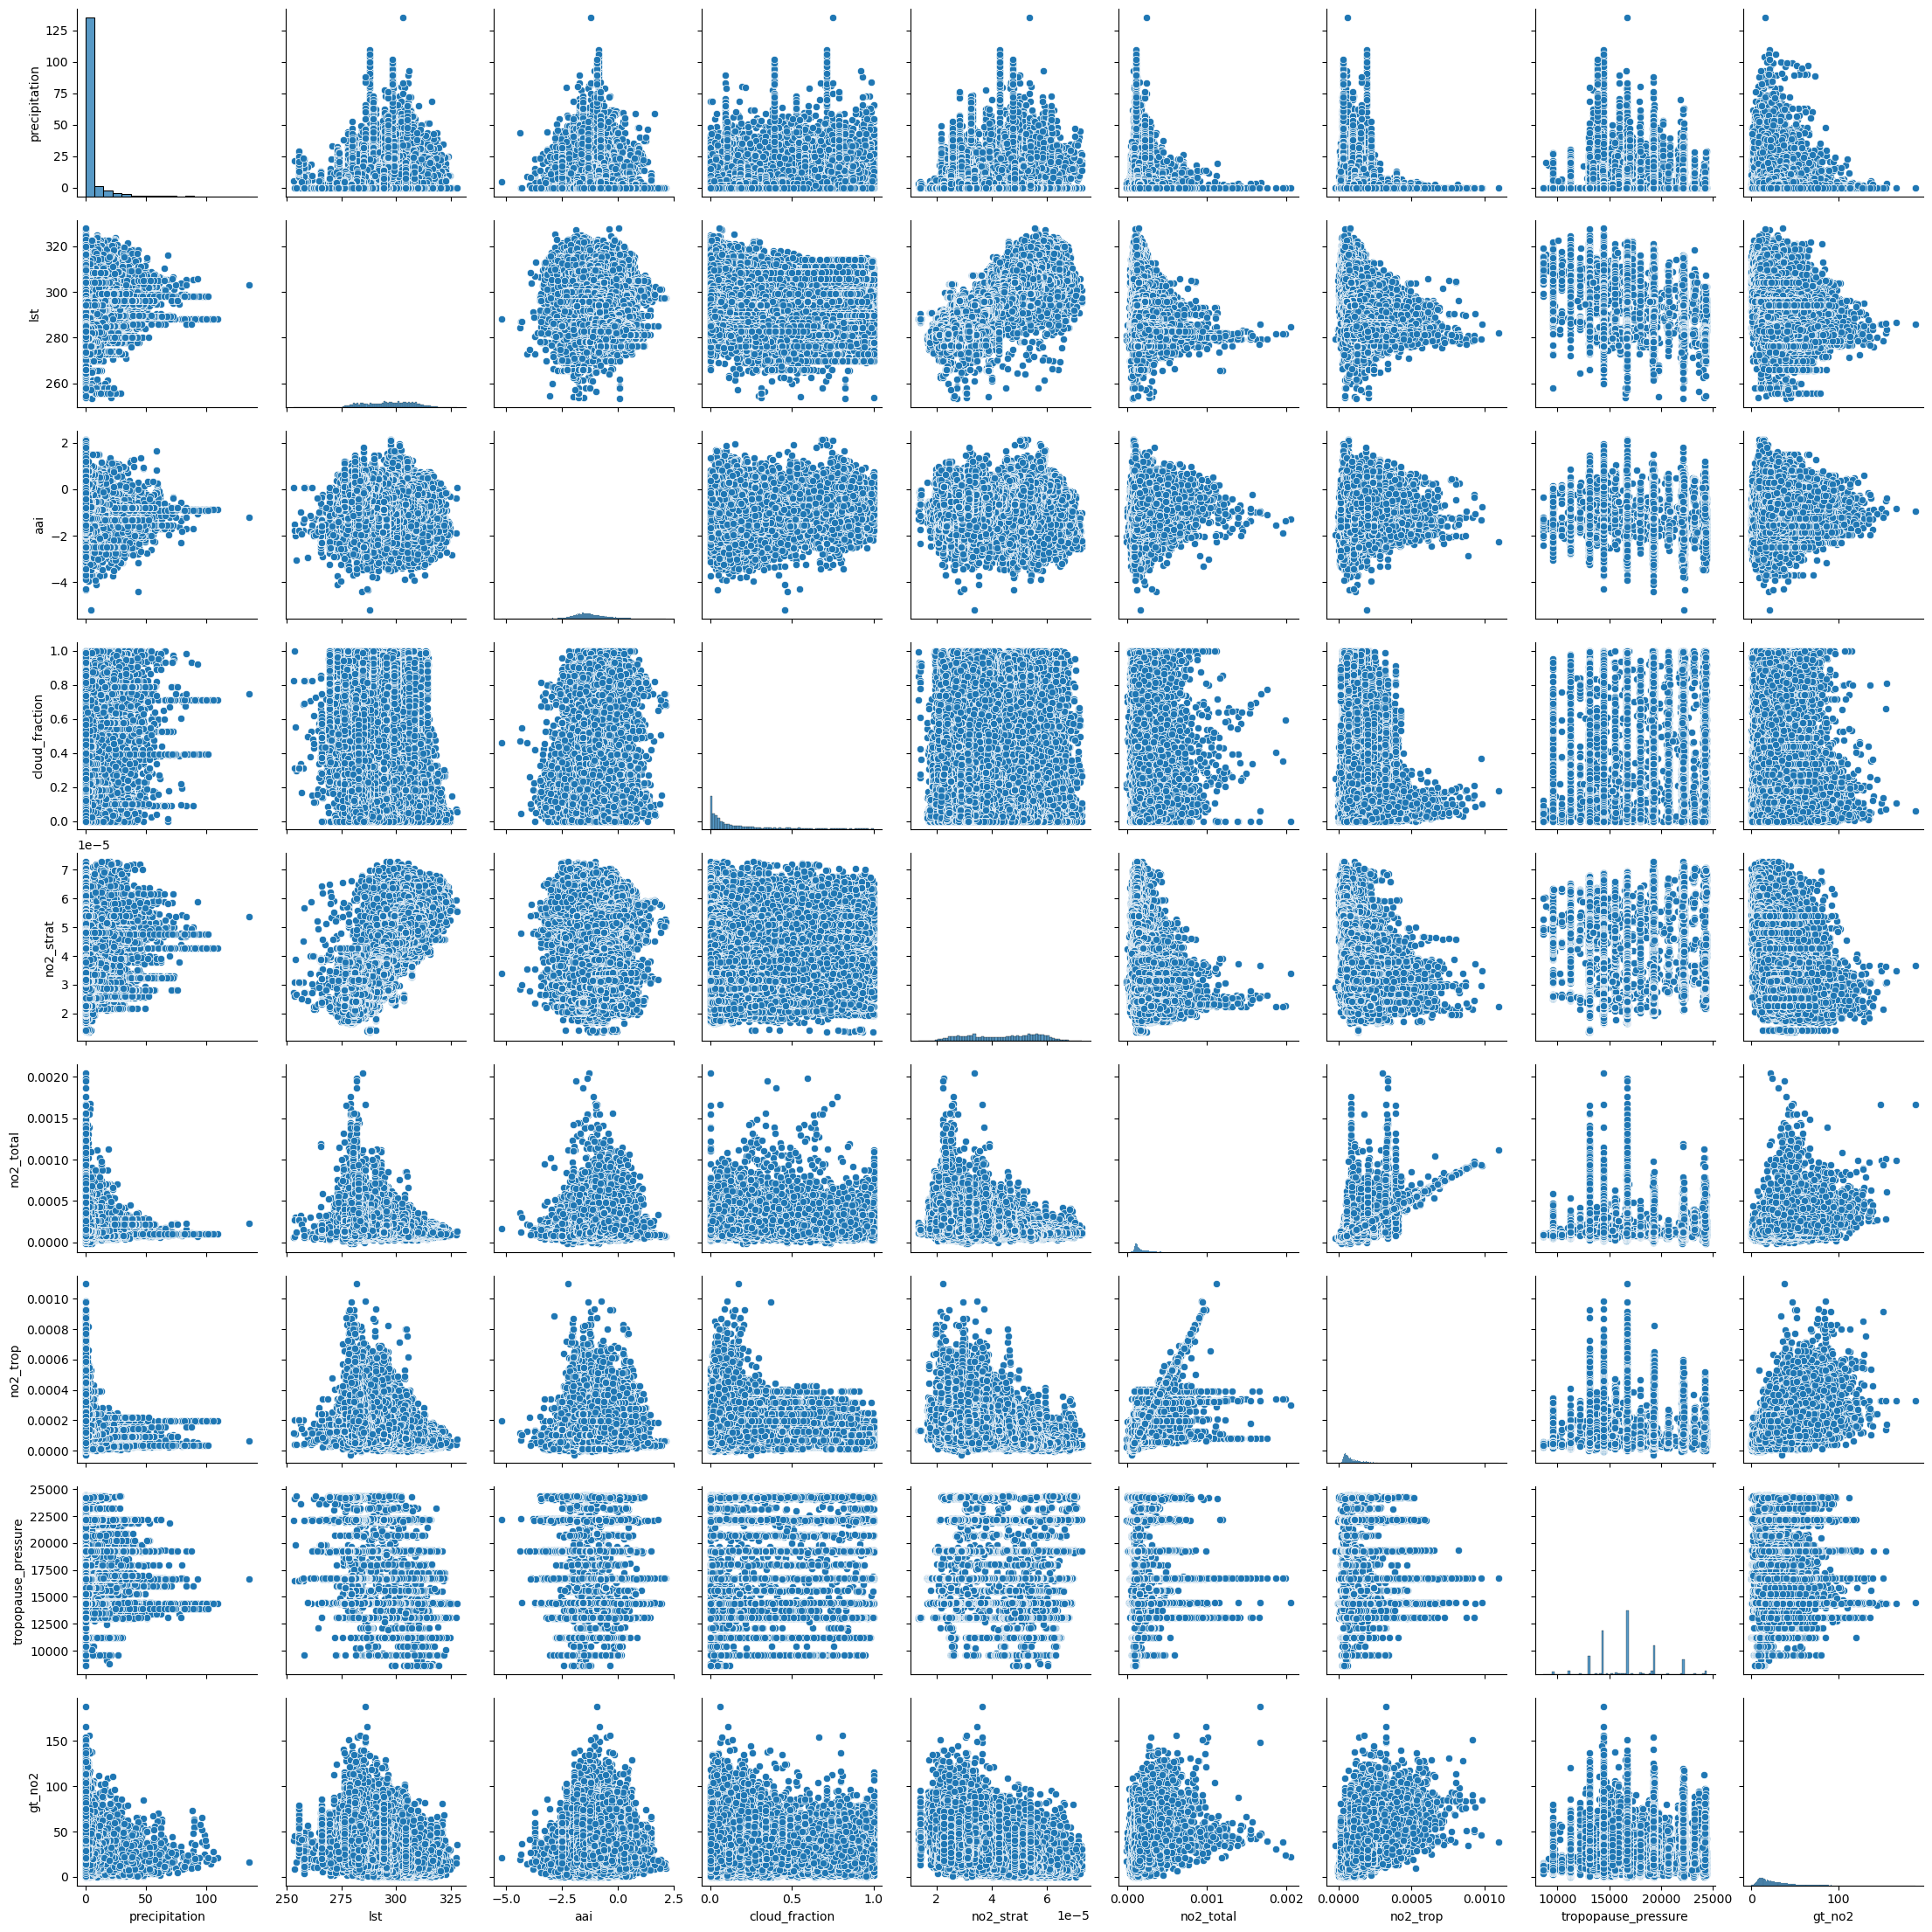

In [19]:
#
df_train_variables = df_train[['precipitation','lst','aai','cloud_fraction','no2_strat','no2_total',
                                                    'no2_trop','tropopause_pressure',"gt_no2"]]
sns.pairplot(df_train_variables)

IQR (Inter Quartile Range) 

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.


IQR = Quartile3 – Quartile1

Syntax: numpy.percentile(arr, n, axis=None, out=None) 
Parameters : 

In [22]:
def iqr_outliers(data:pd.DataFrame,
                columns_list:list) -> pd.DataFrame:   
    
    for column in columns_list:
        pass

    
# Function to detect outliers using IQR
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers
outliers = detect_outliers(df_train)
outliers.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Exploratory Analysis

In [23]:
# Compute the Pearson correlation matrix
corr_matrix = df_train_variables.corr(method='pearson')

# Display the correlation of all variables with the dependent variable 'gt_no2'
print("Correlation of variables with 'gt_no2':")
print(corr_matrix['gt_no2'])

Correlation of variables with 'gt_no2':
precipitation         -0.033914
lst                   -0.517284
aai                    0.148761
cloud_fraction         0.043336
no2_strat             -0.563354
no2_total              0.554966
no2_trop               0.625687
tropopause_pressure    0.046784
gt_no2                 1.000000
Name: gt_no2, dtype: float64


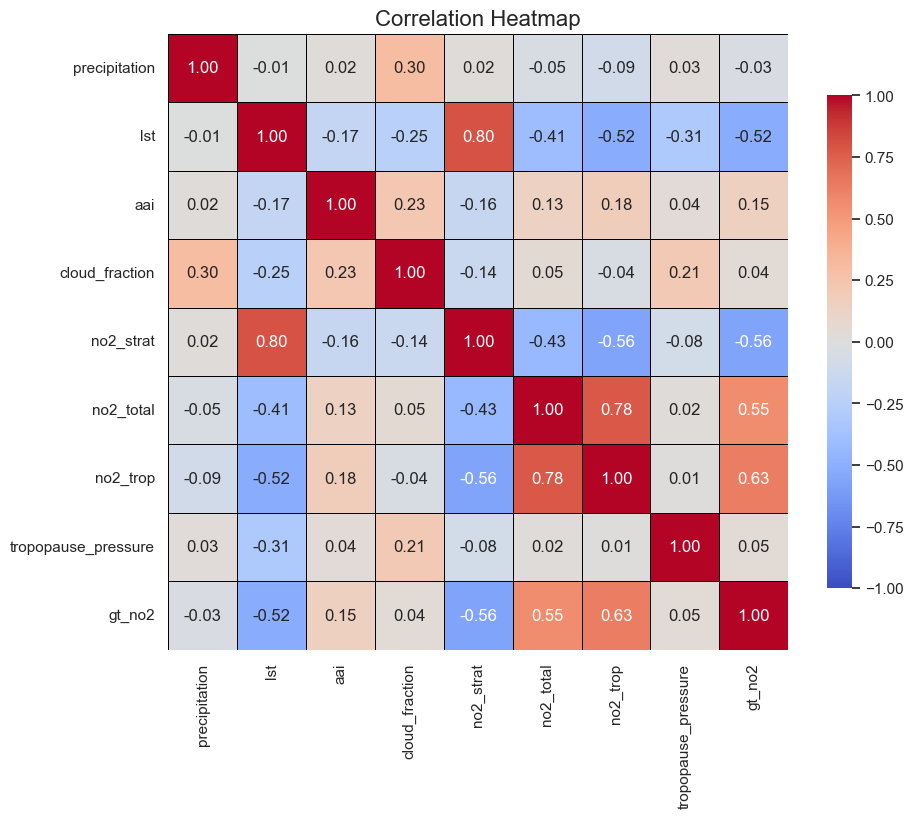

In [24]:
# Set the style
sns.set(style='white')

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                      vmin=-1, vmax=1, center=0, linewidths=0.5, 
                      linecolor='black', cbar_kws={'shrink': .8})

# Set plot title and labels
plt.title('Correlation Heatmap', size=16)
plt.show()

Derived Metrics

We are going to try to dereived some new metrics from the datasets



### Insights

**Temperature and Precipitation Correlation**

Analyze the relationship between land surface temperature and precipitation to understand their combined effect on NO2 levels.

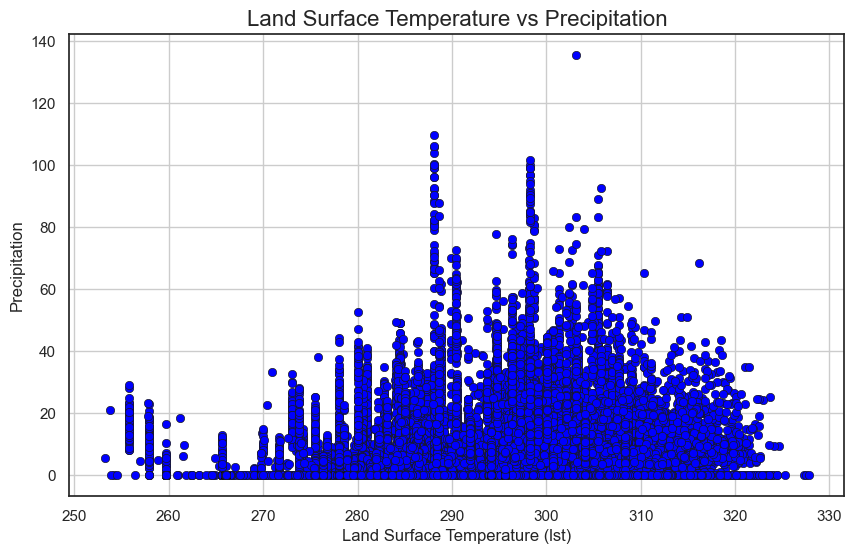

In [ ]:
# Extract the relevant columns
data_subset = df_train[['lst', 'precipitation']]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_subset, x='lst', y='precipitation', color='blue', edgecolor='k')

# Set plot title and labels
plt.title('Land Surface Temperature vs Precipitation', size=16)
plt.xlabel('Land Surface Temperature (lst)')
plt.ylabel('Precipitation')
plt.grid(True)
plt.show()

**Cloud Impact on NO2 Measurements**

 Investigate how cloud fraction affects the accuracy of NO2 measurements from remote sensing data.

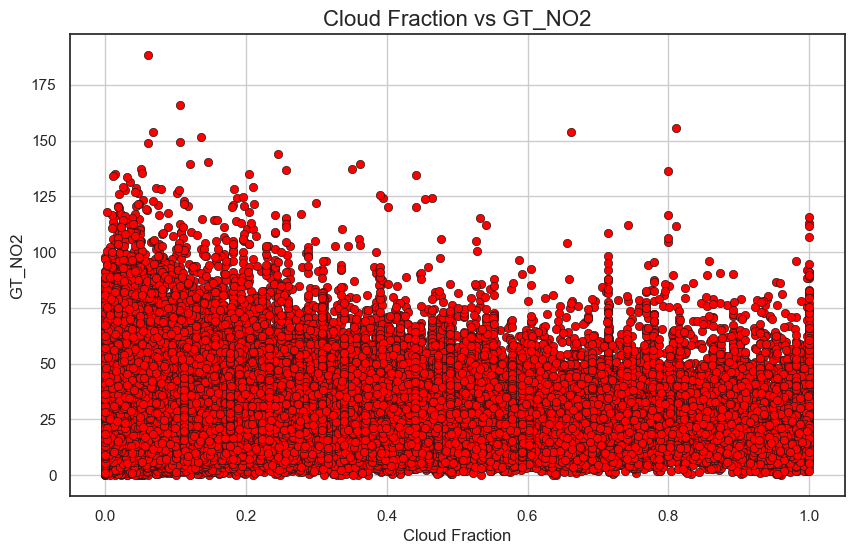

In [ ]:
# Extract the relevant columns
data_subset = df_train[['cloud_fraction', 'gt_no2']]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_subset, x='cloud_fraction', y='gt_no2', color='red', edgecolor='k')

# Set plot title and labels
plt.title('Cloud Fraction vs GT_NO2', size=16)
plt.xlabel('Cloud Fraction')
plt.ylabel('GT_NO2')
plt.grid(True)

In [90]:
df_train_viz .reset_index()

,date,id_zindi,id,lat,lon,precipitation,lst,aai,cloud_fraction,no2_strat,no2_total,no2_trop,tropopause_pressure,gt_no2,year,month,week
0,2019-01-01,ID_ENTGC7,PD01,45.601585,11.903551,0.000000,281.242759,0.230527,0.559117,0.000024,0.000117,0.000182,14440.821260,31.000,2019,1,1
1,2019-01-01,ID_8JCCXC,PD04,45.371005,11.840830,3.047342,281.242759,-0.074006,0.869309,0.000024,0.000127,0.000182,14441.798150,42.000,2019,1,1
2,2019-01-01,ID_V3136Z,RO01,45.045825,12.060869,0.000000,281.242759,0.024470,0.674160,0.000024,0.000086,0.000182,14437.382940,31.000,2019,1,1
3,2019-01-01,ID_KRVZDJ,RO02,45.104075,11.553241,1.200467,281.242759,-0.010442,0.920054,0.000024,0.000124,0.000182,14440.838310,30.000,2019,1,1
4,2019-01-01,ID_PR351A,RO03,45.038758,11.790152,1.274564,281.242759,-0.176178,0.747464,0.000024,0.000116,0.000182,14438.790370,58.000,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86579,2021-12-31,ID_NCWXIY,X9897,45.498227,9.556232,0.000000,282.759130,-0.434350,0.250490,0.000032,0.000643,0.000197,13063.797700,39.750,2021,12,52
86580,2021-12-31,ID_UDQIEE,X9928,45.142541,10.043836,0.000000,282.759130,-0.609772,0.188995,0.000032,0.000358,0.000197,13061.297581,30.125,2021,12,52
86581,2021-12-31,ID_ENDUPX,X9969,45.842207,9.351658,0.000000,284.980000,-0.157753,0.000000,0.000031,0.000153,0.000122,13050.164990,28.325,2021,12,52
86582,2021-12-31,ID_3ZBA6C,X9993,45.113503,8.874065,0.000000,282.759130,-0.798636,0.399524,0.000031,0.000717,0.000197,13061.413290,21.250,2021,12,52


In [91]:
# Set the 'date' column as the index for time series analysis
df_train_viz = df_train.copy().reset_index()
df_train_viz.set_index('date', inplace=True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig.suptitle('Temporal Variation of NO2 Concentrations', size=16)

# Plot NO2 vs. Precipitation
sns.lineplot(data=df_train_viz , x=df_train_viz .index, y='gt_no2', ax=axs[0, 0], color='blue', label='NO2')
sns.lineplot(data=df_train_viz , x=df_train_viz .index, y='precipitation', ax=axs[0, 0], color='red', label='Precipitation', linestyle='--')
axs[0, 0].set_title('NO2 vs. Precipitation')
axs[0, 0].set_ylabel('NO2 & Precipitation')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot NO2 vs. Temperature
sns.lineplot(data=df_train_viz , x=df_train_viz .index, y='gt_no2', ax=axs[0, 1], color='blue', label='NO2')
sns.lineplot(data=df_train_viz , x=df_train_viz .index, y='lst', ax=axs[0, 1], color='orange', label='Temperature', linestyle='--')
axs[0, 1].set_title('NO2 vs. Temperature')
axs[0, 1].set_ylabel('NO2 & Temperature')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot NO2 vs. Cloud Cover
sns.lineplot(data=df_train_viz , x=df_train_viz .index, y='gt_no2', ax=axs[1, 0], color='blue', label='NO2')
sns.lineplot(data=df_train_viz , x=df_train_viz .index, y='cloud_fraction', ax=axs[1, 0], color='green', label='Cloud Cover', linestyle='--')
axs[1, 0].set_title('NO2 vs. Cloud Cover')
axs[1, 0].set_ylabel('NO2 & Cloud Cover')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Empty subplot (for symmetry)
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. **Derived NO2 Metrics:**
   - **NO2 Column Ratios**: Calculate the ratios between different NO2 columns, such as the ratio of tropospheric to total NO2, which can indicate the relative contribution of the troposphere to the total NO2 concentration.
   - **NO2 Residuals**: Compute the difference between ground truth NO2 and tropospheric or total NO2 measurements to understand discrepancies and potential calibration needs.


3. **Air Quality and Atmospheric Conditions:**
   - **NO2 vs. AAI**: Explore the correlation between NO2 concentrations and the aerosol absorbing index to assess how aerosols influence NO2 distribution and concentration.
   - **Precipitation Impact on NO2**: Analyze how precipitation events affect NO2 levels, considering the potential for rain to wash out NO2 from the atmosphere.
   - **Temperature and NO2 Dynamics**: Study the interaction between land surface temperature and NO2 concentrations to understand the temperature dependency of NO2 levels.

4. **Pressure and NO2 Relations:**
   - **Tropopause Pressure Effects**: Examine how variations in tropopause pressure influence stratospheric and tropospheric NO2 concentrations.

5. **Temporal and Spatial Patterns:**
   - **Temporal Trends**: Analyze the temporal variation of NO2 concentrations concerning other variables such as precipitation, temperature, and cloud cover.
   - **Spatial Distribution**: Map the spatial distribution of NO2 and other variables to identify hotspots and patterns in NO2 levels.

6. **Composite Indices and Indicators:**
   - **Air Quality Index (AQI)**: Develop a composite air quality index incorporating NO2 levels and other factors like AAI and cloud fraction.
   - **Climate and Pollution Interaction Index**: Create an index to measure the interaction between climate variables (like temperature and precipitation) and pollution levels (NO2).

By combining and analyzing these datasets, researchers can gain deeper insights into the factors affecting NO2 concentrations, improve the accuracy of NO2 estimation models, and contribute to more effective air quality monitoring and management.

In an exploratory data analysis (EDA) phase, you can conduct various analyses to understand the relationships, patterns, and characteristics of the provided data attributes. Here are several analyses you can perform:

### Univariate Analysis
1. **Descriptive Statistics**: Calculate mean, median, mode, standard deviation, variance, skewness, and kurtosis for each variable.
2. **Distribution Analysis**: Use histograms, box plots, and density plots to understand the distribution of each variable.
3. **Outlier Detection**: Identify outliers using box plots and z-scores.

### Bivariate Analysis
1. **Correlation Analysis**: Compute the correlation matrix and visualize it using a heatmap to identify relationships between variables.
2. **Scatter Plots**: Create scatter plots to visualize the relationship between pairs of continuous variables (e.g., NO2 vs. LST, NO2 vs. precipitation).
3. **Box Plots and Violin Plots**: Compare the distribution of NO2 levels across different categorical variables if any (e.g., different time periods or regions).

### Multivariate Analysis
1. **Pair Plot (Scatterplot Matrix)**: Create pair plots to visualize relationships between multiple variables simultaneously.
2. **Principal Component Analysis (PCA)**: Reduce dimensionality and identify the main components explaining the variance in the data.
3. **Multivariate Correlation Analysis**: Use techniques like canonical correlation analysis to explore relationships between sets of variables.

### Temporal Analysis
1. **Time Series Analysis**: Plot time series of NO2 concentrations and other variables to identify trends, seasonality, and cyclic patterns.
2. **Autocorrelation and Partial Autocorrelation**: Analyze temporal dependencies in NO2 levels.
3. **Rolling Statistics**: Compute rolling means and variances to understand how NO2 levels change over time.

### Spatial Analysis
1. **Geospatial Mapping**: Use geospatial visualization tools (e.g., folium, geopandas) to map NO2 concentrations and other variables spatially.
2. **Spatial Autocorrelation**: Calculate Moran's I to assess the degree of spatial clustering.
3. **Hotspot Analysis**: Identify areas with significantly high or low NO2 levels using techniques like Getis-Ord Gi*.

### Interactions and Joint Distributions
1. **Hexbin Plots**: Use hexbin plots to visualize the joint distribution of two variables, especially useful for large datasets.
2. **Contour Plots**: Create contour plots to show the density of data points in the joint space of two variables.

### Feature Engineering
1. **Interaction Terms**: Create interaction terms between variables (e.g., LST * precipitation) to capture combined effects.
2. **Lag Features**: Create lag features for time series analysis to incorporate the effect of past values on current NO2 levels.
3. **Polynomial Features**: Generate polynomial terms to capture non-linear relationships.

### Hypothesis Testing
1. **ANOVA and t-tests**: Conduct hypothesis tests to compare means of NO2 levels across different groups or conditions.
2. **Chi-Square Test**: Perform chi-square tests for independence between categorical variables if any.

### Visualization Techniques
1. **Heatmaps**: Visualize the correlation matrix or spatial data distributions.
2. **3D Scatter Plots**: Use 3D scatter plots to explore relationships between three variables simultaneously.
3. **Parallel Coordinates Plot**: Visualize multivariate data and identify patterns and correlations.

### Data Transformation and Cleaning
1. **Normalization and Standardization**: Apply normalization or standardization to ensure all variables are on a comparable scale.
2. **Missing Value Imputation**: Analyze patterns of missing data and apply appropriate imputation methods.

By conducting these analyses, you can gain a comprehensive understanding of your dataset, identify key patterns and relationships, and generate insights that can guide further modeling and hypothesis testing efforts.

Visualizing Geographical Data

Check f any of the weather station location is wrong by plotting it on basemap suing geopadnas

In [ ]:
import contextily as cx

train_data_gdf = gpd.geopandas.GeoDataFrame(
    train_data_df, geometry=gpd.points_from_xy(train_data_df.lon, train_data_df.lat), crs="EPSG:4326"
)
ax = train_data_gdf.plot(figsize=(10,5),color='red')


ModuleNotFoundError: No module named 'contextily'

Dispaly the Noz value at ech location

In [ ]:
data.plot(kind="scatter", x="lon", y="lat", alpha=0.4,
 s=data["no2_gt"]/100, label="No2", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Looking for correlations

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. Figure 2-14 shows various plots along with the correlation coeffi‐
cient between their horizontal and vertical axes.


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this
plot reveals other less obvious straight lines: a horizontal line around $450,000,
another around $350,000, perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)



Experimenting with Attribute Combinations

Prepare the Data for Machine Learning Algorithm

### ML MODELLING AND PREDICTION

In [25]:
# data 
df_train.head()

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloud_fraction,no2_strat,no2_total,no2_trop,tropopause_pressure,gt_no2,year,month,week
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,281.242759,0.230527,0.559117,0.000024,0.000117,0.000182,14440.82126,31.0,2019,1,1
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,281.242759,-0.074006,0.869309,0.000024,0.000127,0.000182,14441.79815,42.0,2019,1,1
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,281.242759,0.024470,0.674160,0.000024,0.000086,0.000182,14437.38294,31.0,2019,1,1
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,281.242759,-0.010442,0.920054,0.000024,0.000124,0.000182,14440.83831,30.0,2019,1,1
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,281.242759,-0.176178,0.747464,0.000024,0.000116,0.000182,14438.79037,58.0,2019,1,1


In [26]:
df_train.columns

Index(['id_zindi', 'date', 'id', 'lat', 'lon', 'precipitation', 'lst', 'aai',
       'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
       'tropopause_pressure', 'gt_no2', 'year', 'month', 'week'],
      dtype='object')

Create Test split dataset

In [ ]:
# np.random.seed(42)

# def split_train_test(data,test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
np.random.seed(42)

# Define features and target
features = ['lat', 'lon', 'precipitation', 'lst', 'aai',
       'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
       'tropopause_pressure', 'year', 'month', 'week']

target = 'gt_no2'

X = df_train[features]
y = df_train[target]

# Split data into train and test sets
train_size = int(0.8 * len(df_train))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Train the models

In [28]:
# train Random Forest Model

model = RandomForestRegressor(random_state = 42)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.918955312713477


In [29]:
rmse = np.sqrt(mse)
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 2.630390714839428


Test Dataset

In [93]:
# Import training and validation sets
test_data_path = "data/Test.csv"
test_df = load_data(test_data_path)
test_df.head()

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloudfraction,no2_strat,no2_total,no2_trop,tropopausepressure
0,ID_2MYNQS,1/1/19,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819
1,ID_P4U5WU,1/1/19,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790
2,ID_U4KWPK,1/1/19,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478
3,ID_QGSNTZ,1/1/19,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006
4,ID_GHSZ6K,1/1/19,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840


In [94]:
def format_date(df: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Converts the date column to datetime and extracts year and month.
    """
    # Convert the date to pandas datetime
    df['date'] = pd.to_datetime(df[date_column])

    # Extract year and month into new fields
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week

    return df

# Apply the format date function
test_df = format_date(test_df, "date")

# Check the data
test_df.head()

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloudfraction,no2_strat,no2_total,no2_trop,tropopausepressure,year,month,week
0,ID_2MYNQS,2019-01-01,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819,2019,1,1
1,ID_P4U5WU,2019-01-01,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790,2019,1,1
2,ID_U4KWPK,2019-01-01,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478,2019,1,1
3,ID_QGSNTZ,2019-01-01,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006,2019,1,1
4,ID_GHSZ6K,2019-01-01,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840,2019,1,1


In [95]:
test_df = test_df.rename({'cloudfraction':'cloud_fraction',
                          'tropopausepressure':'tropopause_pressure'},axis=1)

In [96]:
# check for the count of total missing values per features
test_df.isna().sum()

id_zindi                  0
date                      0
id                        0
lat                       0
lon                       0
precipitation             0
lst                    2981
aai                     868
cloud_fraction          868
no2_strat               868
no2_total               868
no2_trop               2578
tropopause_pressure     868
year                      0
month                     0
week                      0
dtype: int64

In [97]:
# Exclude 'gt_no2' from the columns for filling missing values since it’s already been filled.
fill_missing_value = test_df[['lst', 'aai', 'cloud_fraction', 'no2_strat',
                                    'no2_total', 'no2_trop', 'tropopause_pressure']]

# Fill missing values by grouping data by year, week, and month.
test_df = fill_missing_values(test_df, fill_missing_value, 'year', 'week', 'month')

# Check the number of missing values in each column after filling.
test_df.isna().sum()

id_zindi               0
date                   0
id                     0
lat                    0
lon                    0
precipitation          0
lst                    0
aai                    0
cloud_fraction         0
no2_strat              0
no2_total              0
no2_trop               0
tropopause_pressure    0
year                   0
month                  0
week                   0
dtype: int64

In [ ]:
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Define the features with potential missing values
# features = [
#     'lat', 'lon', 'precipitation', 'lst', 'aai',
#     'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
#     'tropopause_pressure', 'year', 'month', 'week'
# ]

# # Initialize the SimpleImputer with mean strategy to fill missing values
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# # Fit the imputer on the specified features of test_df
# imputer = imputer.fit(test_df[features])

# # Transform the data and convert it back to a DataFrame to keep column names
# test_df[features] = imputer.transform(test_df[features])

# # Display the updated DataFrame
# print(test_df)


In [98]:
features = ['lat', 'lon', 'precipitation', 'lst', 'aai',
       'cloud_fraction', 'no2_strat', 'no2_total', 'no2_trop',
       'tropopause_pressure', 'year', 'month', 'week']

target = 'gt_no2'

X_test = test_df[features]
# y_test = test_df[target]

In [99]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(y_pred)

[35.77091    35.04825    36.34000313 ... 36.71824631 65.6046733
 32.38472776]


In [ ]:
# mse = mean_absolute_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

In [100]:
test_data_path = "data/Test.csv"
test_df = load_data(test_data_path)
test_df.head()

,id_zindi,date,id,lat,lon,precipitation,lst,aai,cloudfraction,no2_strat,no2_total,no2_trop,tropopausepressure
0,ID_2MYNQS,1/1/19,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819
1,ID_P4U5WU,1/1/19,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790
2,ID_U4KWPK,1/1/19,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478
3,ID_QGSNTZ,1/1/19,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006
4,ID_GHSZ6K,1/1/19,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840


In [101]:
# print(np.array(y_pred))
test_df['GT_NO2'] = y_pred

In [102]:
submission_df = test_df[['id_zindi','GT_NO2']]

In [103]:
submission_df.to_csv('submission.csv',index=False)

In [104]:
# train Random Forest Model

model = GradientBoostingRegressor(random_state = 42)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ValueError: Found input variables with inconsistent numbers of samples: [17317, 6576]

In [49]:
# train Random Forest Model

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.093604914839318


In [53]:
# train Random Forest Model
np.random.seed(42)
model = LinearRegression()

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.05454427789128


In [ ]:
# train Random Forest Model
model = XGBRegressor()

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### Load Test Data

Define Pipeline for Each Model

In [ ]:
# Example: assuming all features are numerical for simplicity
numerical_features = x_train.columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Model pipelines
pipelines = {
    'SVR': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]),
    'LinearRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'DecisionTree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])
}


Define Hyperparameter Grids

In [ ]:
# Hyperparameter grids
param_grids = {
    'SVR': {
        'regressor__C': [0.1, 1, 10],  # Regularization parameter
        'regressor__gamma': ['scale', 'auto']  # Kernel coefficient
    },
    'GradientBoosting': {
        'regressor__n_estimators': [100, 200],  # Number of boosting stages
        'regressor__learning_rate': [0.1, 0.05],  # Shrinkage rate
        'regressor__max_depth': [3, 5]  # Maximum depth of the individual trees
    },
    'LinearRegression': {},  # No hyperparameters to tune
    'DecisionTree': {
        'regressor__max_depth': [None, 10, 20],  # Maximum depth of the tree
        'regressor__min_samples_split': [2, 5, 10]  # Minimum samples to split a node
    },
    'RandomForest': {
        'regressor__n_estimators': [100, 200],  # Number of trees in the forest
        'regressor__max_depth': [None, 10, 20],  # Maximum depth of the individual trees
        'regressor__min_samples_split': [2, 5, 10]  # Minimum samples to split a node
    }
}


Perform Cross-Validation and Hyperparameter Tuning

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}

for name, pipeline in pipelines.items():
    if param_grids[name]:  # Only perform GridSearchCV if there are hyperparameters to tune
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=kf, n_jobs=-1, verbose=2)
        grid_search.fit(x_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"{name} best parameters: {grid_search.best_params_}")
    else:
        # Perform cross-validation
        cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf)
        print(f"{name} cross-validation scores: {cv_scores}")
        print(f"{name} mean cross-validation score: {cv_scores.mean()}")
        pipeline.fit(x_train, y_train)
        best_models[name] = pipeline


Evaluate on Test Data

In [ ]:
results = {}

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse}, R2: {r2}")

# Plotting the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(12, 6), legend=False)
plt.suptitle('Model Performance')
plt.show()


Standard Scalling